# Importing Libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


# Sklearn models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
bike_data=pd.read_csv("hour.csv")

# Exploratory Data Analysis

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_data.shape

(17379, 17)

In [5]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Attribute information

In [6]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Missing Value Analysis

check null values in dataset

In [7]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

from here it's clear that there is no null data 

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dteday is Object and temp,atemp,hum,windspeed are float other than these all other are integers.

# Exploratory Data Analysis

## Cleansing data

In [9]:
#changing column names
bike_data.columns=['Instant', 'Dteday', 'Season', 'Yr', 'Mnth', 'Hr', 'Holiday', 'Weekday',
       'Workingday', 'Weathersit', 'Temp', 'Atemp', 'Hum', 'Windspeed',
       'Casual', 'Registered', 'Cnt']

In [10]:
bike_data['Dteday'].value_counts()

2011-03-08    24
2012-07-16    24
2011-09-11    24
2012-01-04    24
2012-12-14    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: Dteday, Length: 731, dtype: int64

In [11]:
bike_data.drop('Dteday',inplace=True,axis=1)

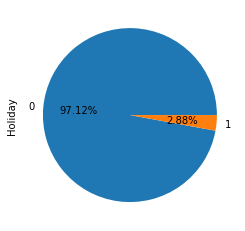

In [12]:
bike_data['Holiday'].value_counts().plot.pie(autopct="%2.2f%%")

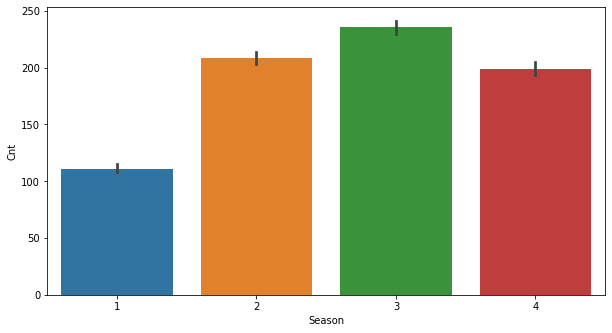

In [13]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.barplot(x="Season", y="Cnt", data=bike_data)

It's clear that in Season 3 is more i.e total rental bikes including both casual and registered

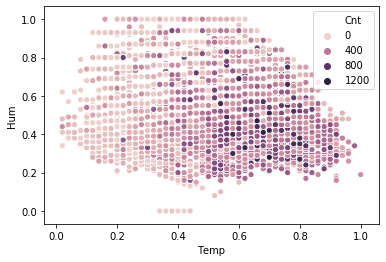

In [14]:
sns.scatterplot(x='Temp',y='Hum',hue='Cnt',data =bike_data)

If temprature increases total rental bikes had been increases.If tempratue increases and Humidity decreases count of total rental bikes also going to high.+

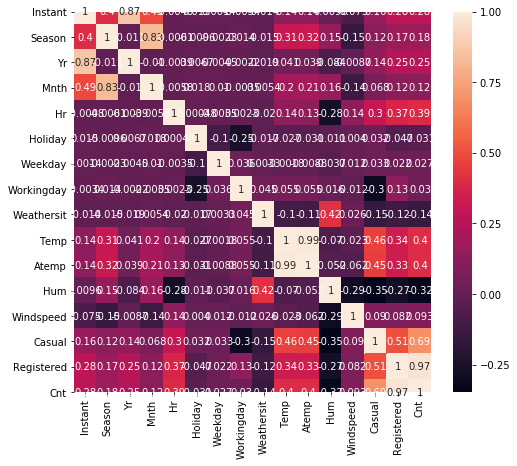

In [15]:
#to check Cor-relation
corr_hmap=bike_data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

#### Observations in Descriptive Analysis

Casual and registered contain direct information about the bike sharing count which is to predict (data leakage). Therefore they are not considered in the feature set.

Humidity Cor-relation with anyother features is not good and it's better to drop this columns

The variables "temp" and "atemp" are strongly correlated. To reduce the dimensionality of the predictive model, the feature "atemp" is dismissed.

The variables "hr" and "temp" seem to be promising features for the bike sharing count prediction.

In [16]:
bike_data.drop("Hum",axis=1,inplace=True)

# Detecting and Removing Ourliers

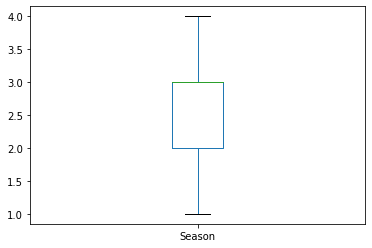

In [17]:
bike_data['Season'].plot.box()

Instant          AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Season        AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Yr            AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Mnth          AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Hr            AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Holiday       AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Weekday       AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Workingday    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Weathersit          AxesSubplot(0.125,0.125;0.0824468x0.343182)
Temp             AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Atemp            AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Windspeed        AxesSubplot(0.421809,0.125;0.0824468x0.343182)
Casual           AxesSubplot(0.520745,0.125;0.0824468x0.343182)
Registered       AxesSubplot(0.619681,0.125;0.0824468x0.343182)
Cnt              AxesSubplot(0.718617,0.125;0.0824468x0.343182)
dtype: object

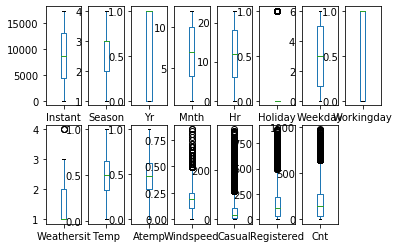

In [18]:
bike_data.plot(kind='box',subplots=True,layout=(2,8))

The working day and holiday box plots indicate that more bicycles are rent during normal working days than on weekends or holidays. The hourly box plots show a local maximum at 8 am and one at 5 pm which indicates that most users of the bicycle rental service use the bikes to get to work or school. Another important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data.

In [19]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(bike_data))
z

array([[1.73195115, 1.3566343 , 1.0051343 , ..., 0.66275506, 0.93018925,
        0.95633924],
       [1.73175182, 1.3566343 , 1.0051343 , ..., 0.56134262, 0.80465484,
        0.82402209],
       [1.73155249, 1.3566343 , 1.0051343 , ..., 0.62219008, 0.83769021,
        0.8681278 ],
       ...,
       [1.73155249, 1.3566343 , 0.99489192, ..., 0.58162511, 0.46769408,
        0.54836135],
       [1.73175182, 1.3566343 , 0.99489192, ..., 0.45993017, 0.69894166,
        0.70824458],
       [1.73195115, 1.3566343 , 0.99489192, ..., 0.48021266, 0.77161947,
        0.77440315]])

In [20]:
threshold=3
np.where((z>3))

(array([  265,   372,   373, ..., 17341, 17343, 17344], dtype=int64),
 array([11,  5,  5, ..., 11, 11, 11], dtype=int64))

In [21]:
z[265][12]

0.6627550640369084

In [22]:
z[17341][12]

0.0948453520887361

In [23]:
bike_new=bike_data[(z<3).all(axis=1)]#removing outliers

In [24]:
bike_data.shape

(17379, 15)

In [25]:
bike_new.shape

(15955, 15)

1445 rows had been removed as Outliers

In [26]:
bike_new

,Instant,Season,Yr,Mnth,Hr,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Windspeed,Casual,Registered,Cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.1343,13,48,61


# Check Distribution Of Skewness

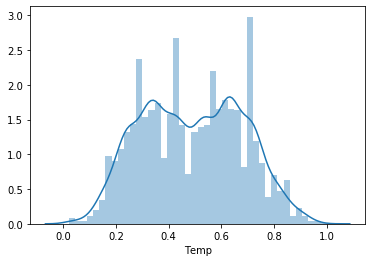

In [27]:
sns.distplot(bike_new['Temp'])

In [28]:
collist=bike_data.iloc[:,:-1].columns
ncol=16
nrows=14

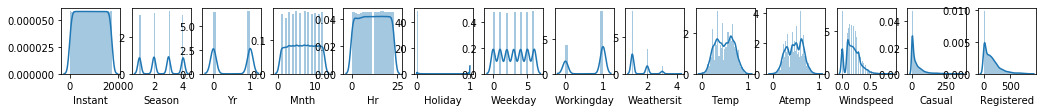

In [29]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(bike_data[collist[i]])

In [30]:
bike_data.skew()

Instant       0.000000
Season       -0.005416
Yr           -0.010243
Mnth         -0.009253
Hr           -0.010680
Holiday       5.638538
Weekday      -0.002998
Workingday   -0.785258
Weathersit    1.228047
Temp         -0.006021
Atemp        -0.090429
Windspeed     0.574905
Casual        2.499237
Registered    1.557904
Cnt           1.277412
dtype: float64

In [31]:
x=bike_new.iloc[:,4:-1]
x.head()

,Hr,Holiday,Weekday,Workingday,Weathersit,Temp,Atemp,Windspeed,Casual,Registered
0,0,0,6,0,1,0.24,0.2879,0.0,3,13
1,1,0,6,0,1,0.22,0.2727,0.0,8,32
2,2,0,6,0,1,0.22,0.2727,0.0,5,27
3,3,0,6,0,1,0.24,0.2879,0.0,3,10
4,4,0,6,0,1,0.24,0.2879,0.0,0,1


In [32]:
y=bike_new.iloc[:,-1]
y.head()

0    16
1    40
2    32
3    13
4     1
Name: Cnt, dtype: int64

In [33]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [34]:
x.skew()

Hr            0.040334
Holiday       0.000000
Weekday      -0.035417
Workingday   -0.954415
Weathersit    0.963764
Temp          0.033909
Atemp        -0.046105
Windspeed     0.398315
Casual       -0.279493
Registered   -0.845369
dtype: float64

still Weatherit has skewness it's better to drop this columns

In [35]:
x.drop('Weathersit',axis=1,inplace=True)

# Building a Machine Learning Model

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=55)

In [37]:
x_train.shape

(15925, 9)

In [38]:
x_test.shape

(30, 9)

In [39]:
y_train.shape

(15925,)

In [40]:
y_test.shape

(30,)

In [41]:
from sklearn.svm import SVC, LinearSVC

In [42]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()

In [43]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('RandomForestRegressor',rfr))
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


score 0.7324148730057389


Performance Measures:
MAE 61.94816813903208
MSE 5184.424051330023
RMSE 72.0029447406842
R-square 0.7437138575276869
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


score 0.9999640988918764


Performance Measures:
MAE 1.0466666666666686
MSE 2.692666666666675
RMSE 1.6409346929925868
R-square 0.9998668910671404


I think it's really good score R-Square is 99.9 and Root-mean-squared-error is 0.83 it's not bad.

In [44]:
pred_rfr=rfr.predict(x_test)
print("Predicted_Count \n",pred_rfr)
print("Actual COunt\n",y_test)

Predicted_Count 
 [  7.    2.  317.9 284.1  16.   21.1   6.  198.6  70.9  92.8 102.1 456.8
  74.   94.9 427.4  12.8  78.2  10.    6.   23.1 424.3 102.2 269.5 223.5
   8.   42.2 124.6 133.8 396.  102.4]
Actual COunt
 2599       7
279        2
13768    320
5885     285
16758     16
16279     21
3556       6
6892     197
9335      69
75        94
13317    101
14486    452
11157     74
12619     94
12626    430
5678      13
1639      77
1931      10
11496      6
14444     23
10182    428
11358    101
15441    271
1104     224
46         8
13464     42
2785     125
9396     133
15823    392
13050    102
Name: Cnt, dtype: int64


# Saving Model

In [45]:
bike_new=pd.DataFrame(pred_rfr)
bike_new.to_csv('Randomforest_bikeshare.csv')

In [46]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'bike_sharing.obj')
#load the model from a file
dct_from_joblib=joblib.load('bike_sharing.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([  7. ,   2. , 317.9, 284.1,  16. ,  21.1,   6. , 198.6,  70.9,
        92.8, 102.1, 456.8,  74. ,  94.9, 427.4,  12.8,  78.2,  10. ,
         6. ,  23.1, 424.3, 102.2, 269.5, 223.5,   8. ,  42.2, 124.6,
       133.8, 396. , 102.4])